# **Import Libraries and Datasets**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('/kaggle/input/customer-clustering/segmentation data.csv')

In [33]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


# **Data Pre-Processing**

In [34]:
df.isna().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df.shape

(2000, 8)

In [37]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [38]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [39]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.328262,0.074403,-0.085246,0.012543,-0.303217,-0.291958,-0.378445
Sex,0.328262,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.074403,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.085246,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.012543,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.303217,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.291958,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.378445,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


In [40]:
df.drop('ID', axis=1, inplace=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


# **Data Visualization**

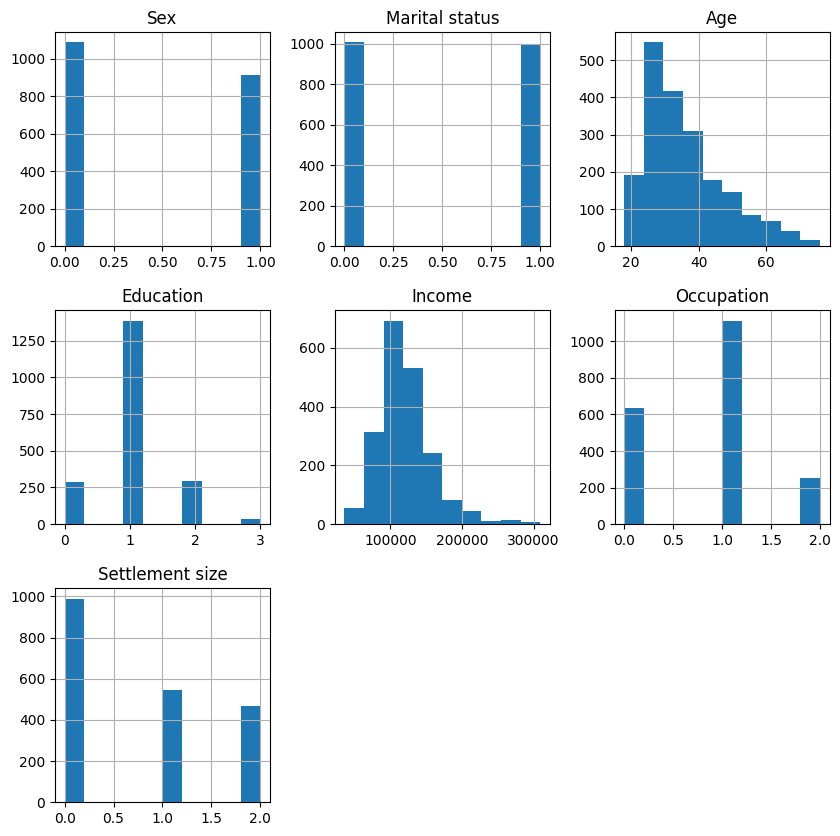

In [42]:
df.hist(figsize =(10,10))
plt.show()

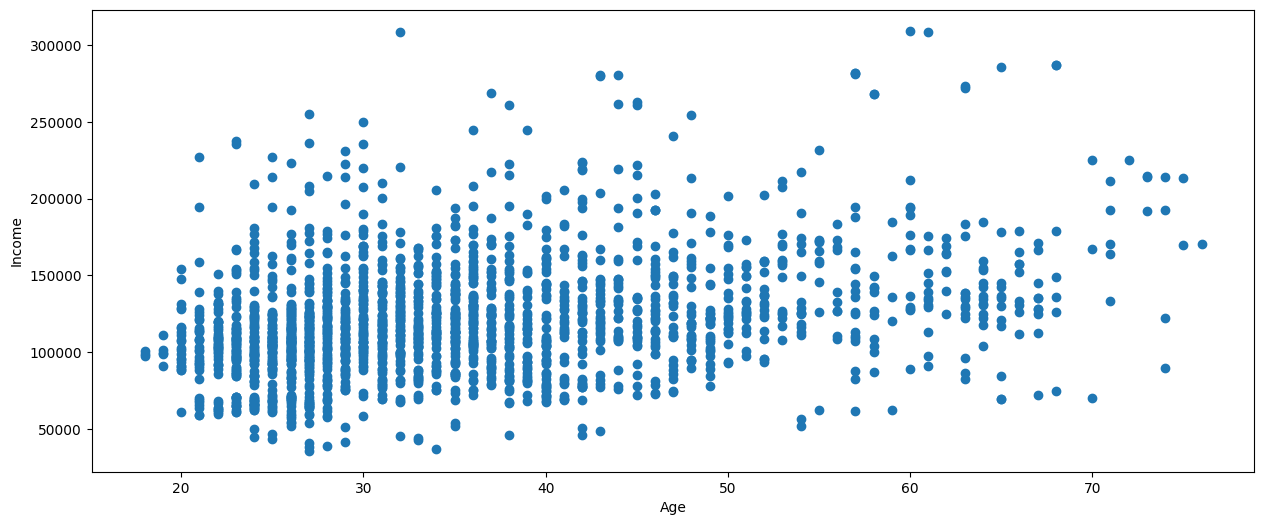

In [43]:
plt.figure(figsize=(15,6))
plt.scatter(df["Age"],df["Income"])

plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

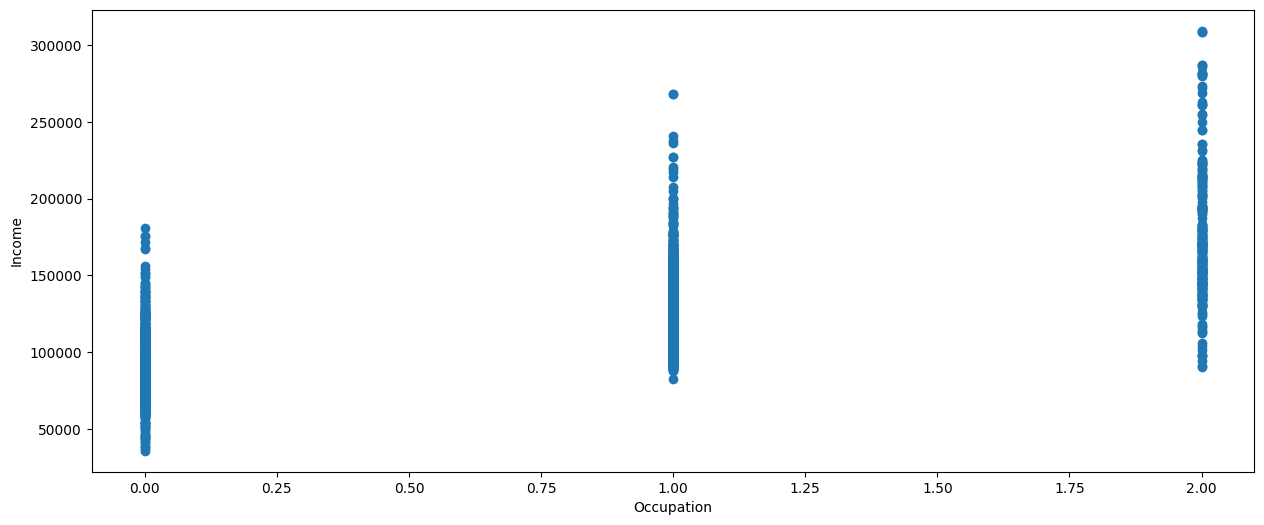

In [44]:
plt.figure(figsize=(15,6))
plt.scatter(df["Occupation"],df["Income"])

plt.xlabel('Occupation')
plt.ylabel('Income')
plt.show()

<Axes: >

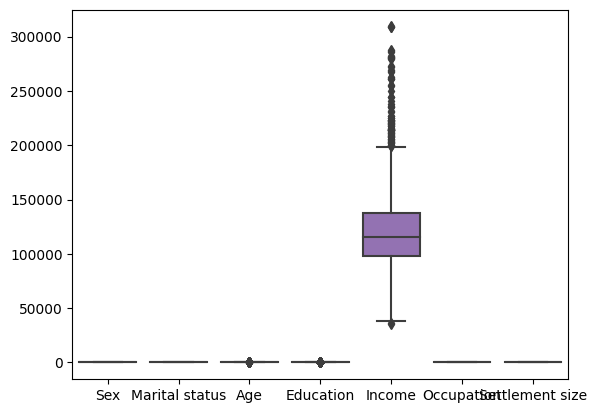

In [45]:
sns.boxplot(df)

# **Training the K-means algorithm on the training dataset**

In [47]:
from sklearn.cluster import KMeans  

In [48]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(df)  

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [51]:
y_predict

array([4, 1, 2, ..., 2, 0, 2], dtype=int32)

In [52]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


# **Visualizing the Clusters**

In [55]:
df['Age'][y_predict == 0]

10      25
12      22
14      28
20      48
24      26
        ..
1989    25
1992    51
1994    45
1996    27
1998    24
Name: Age, Length: 719, dtype: int64

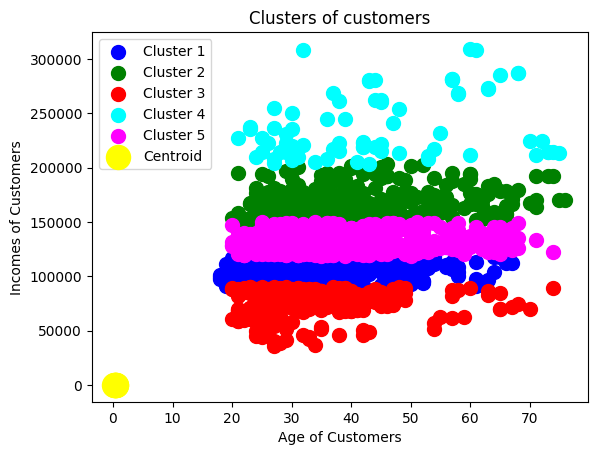

In [57]:
#visulaizing the clusters  
plt.scatter(df['Age'][y_predict == 0], df['Income'][y_predict == 0], s = 100, 
            c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(df['Age'][y_predict == 1], df['Income'][y_predict == 1], s = 100, 
            c = 'green', label = 'Cluster 2') #for second cluster  
plt.scatter(df['Age'][y_predict == 2], df['Income'][y_predict == 2], s = 100, 
            c = 'red', label = 'Cluster 3') #for third cluster  
plt.scatter(df['Age'][y_predict == 3], df['Income'][y_predict == 3], s = 100, 
            c = 'cyan', label = 'Cluster 4') #for fourth cluster  
plt.scatter(df['Age'][y_predict == 4], df['Income'][y_predict == 4], s = 100, 
            c = 'magenta', label = 'Cluster 5') #for fifth cluster  

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s = 300, c = 'yellow', label = 'Centroid')   

plt.title('Clusters of customers')  
plt.xlabel('Age of Customers')  
plt.ylabel('Incomes of Customers')  
plt.legend()  
plt.show()  